# Programming assignment 1: k-Nearest Neighbors classification

In [1]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
%matplotlib inline  

## Introduction
For those of you new to Python, there are lots of tutorials online, just pick whichever you like best :)

If you never worked with Numpy or Jupyter before, you can check out these guides
* https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
* http://jupyter.readthedocs.io/en/latest/

## Your task
In this notebook code to perform k-NN classification is provided. However, some functions are incomplete. Your task is to fill in the missing code and run the entire notebook. 

You are only allowed to use the imported packages. Importing anything else is NOT allowed. 

In the beginning of every function there is docstring, which specifies the format of input and output. Write your code in a way that adheres to it.
You may only use plain python and `numpy` functions (i.e. no scikit-learn classifiers).

In addition, we strongly recommend you to solve this task **without a single for loop**, i.e., only via vectorized (`numpy`) operations.

## Exporting the results to PDF
Once you complete the assignments, export the entire notebook as PDF and attach it to your homework solutions. 
The best way of doing that is
1. Run all the cells of the notebook.
2. Export/download the notebook as PDF (File -> Download as -> PDF via LaTeX (.pdf)).
3. Concatenate your solutions for other tasks with the output of Step 2. On a Linux machine you can simply use `pdfunite`, there are similar tools for other platforms too. You can only upload a single PDF file to Moodle.

Make sure you are using `nbconvert` Version 5.5 or later by running `jupyter nbconvert --version`. Older versions clip lines that exceed page width, which makes your code harder to grade.

## Load dataset
The iris data set (https://en.wikipedia.org/wiki/Iris_flower_data_set) is loaded and split into train and test parts by the function `load_dataset`.

In [2]:
def load_dataset(split):
    """Load and split the dataset into training and test parts.
    
    Parameters
    ----------
    split : float in range (0, 1)
        Fraction of the data used for training.
    
    Returns
    -------
    X_train : array, shape (N_train, 4)
        Training features.
    y_train : array, shape (N_train)
        Training labels.
    X_test : array, shape (N_test, 4)
        Test features.
    y_test : array, shape (N_test)
        Test labels.
    """
    dataset = datasets.load_iris()
    X, y = dataset['data'], dataset['target']
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=123, test_size=(1 - split))
    return X_train, X_test, y_train, y_test

In [3]:
# prepare data
split = 0.75
X_train, X_test, y_train, y_test = load_dataset(split)

## Plot dataset
Since the data has 4 features, 16 scatterplots (4x4) are plotted showing the dependencies between each pair of features.

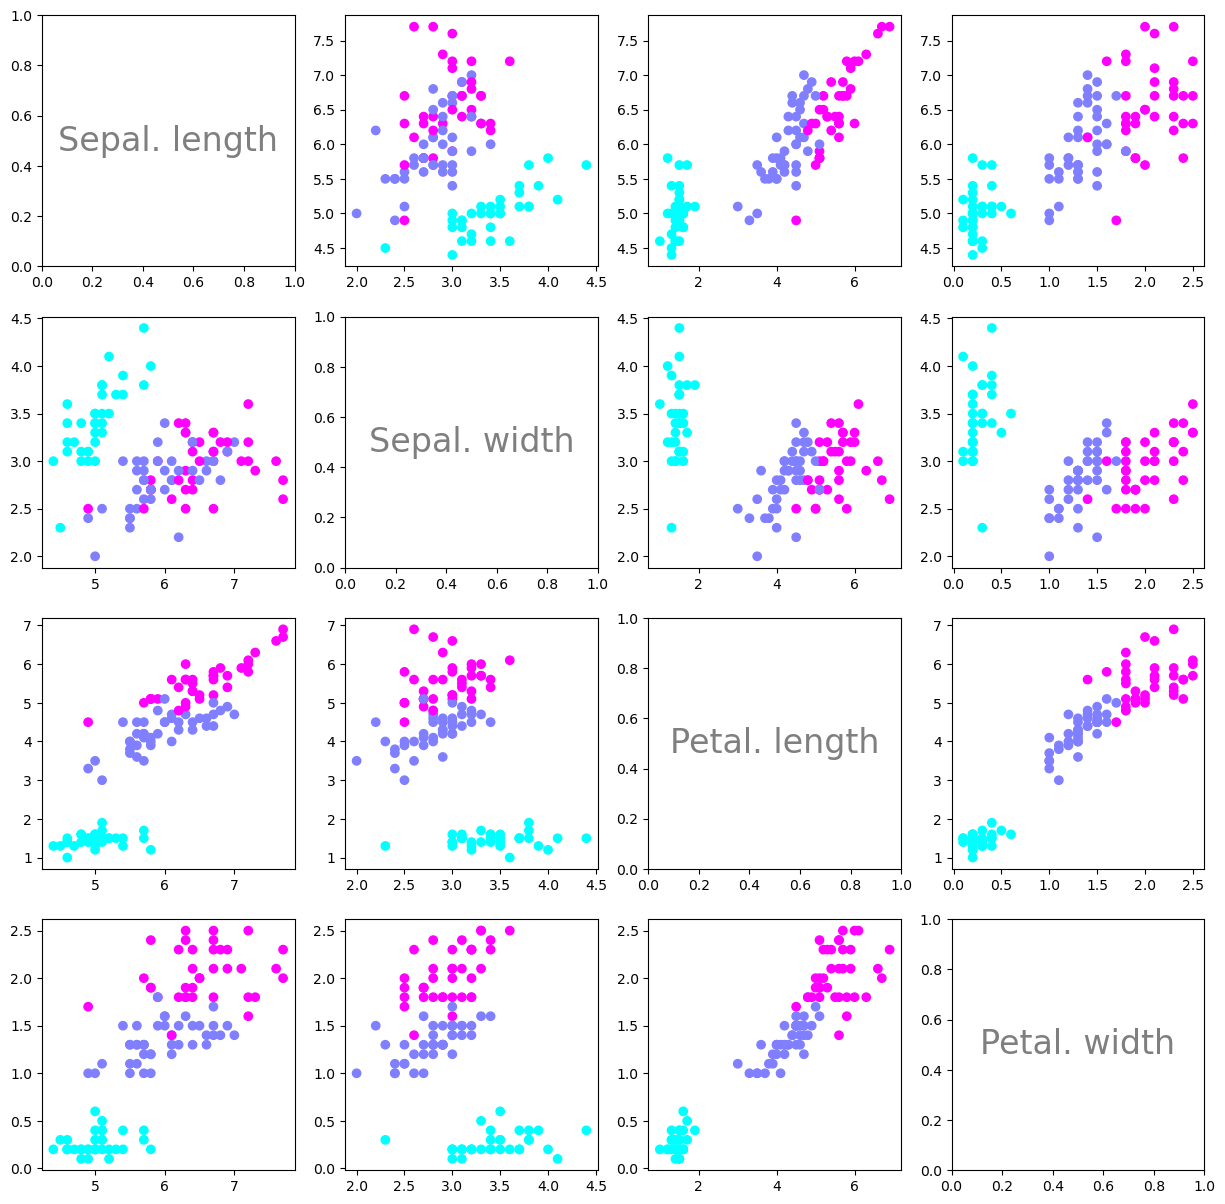

In [4]:
f, axes = plt.subplots(4, 4,figsize=(15, 15))
for i in range(4):
    for j in range(4):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(X_train[:,j],X_train[:,i], c=y_train, cmap=plt.cm.cool)

## Task 1: Euclidean distance
Compute Euclidean distance between two data points.

In [5]:
def euclidean_distance(x1, x2):
    """Compute pairwise Euclidean distances between two data points.
    
    Parameters
    ----------
    x1 : array, shape (N, 4)
        First set of data points.
    x2 : array, shape (M, 4)
        Second set of data points.

    Returns
    -------
    distance : float array, shape (N, M)
        Pairwise Euclidean distances between x1 and x2.
    """
    # TODO
    return np.sqrt(np.sum((x1[:,np.newaxis,:] - x2[np.newaxis,:,:])**2, axis=2))

## Task 2: get k nearest neighbors' labels
Get the labels of the *k* nearest neighbors of the datapoint *x_new*.

In [6]:
def get_neighbors_labels(X_train, y_train, X_new, k):
    """Get the labels of the k nearest neighbors of the datapoints x_new.
    
    Parameters
    ----------
    X_train : array, shape (N_train, 4)
        Training features.
    y_train : array, shape (N_train)
        Training labels.
    X_new : array, shape (M, 4)
        Data points for which the neighbors have to be found.
    k : int
        Number of neighbors to return.
        
    Returns
    -------
    neighbors_labels : array, shape (M, k)
        Array containing the labels of the k nearest neighbors.
    """
    distance_matrix = euclidean_distance(X_new,X_train)
    ind = np.argsort(distance_matrix, axis=1)
    result_matrix = (np.take_along_axis(y_train[np.newaxis,:], ind, axis=1))[:,0:k]
    
    # TODO
    return result_matrix

## Task 3: get the majority label
For the previously computed labels of the *k* nearest neighbors, compute the actual response. I.e. give back the class of the majority of nearest neighbors. In case of a tie, choose the "lowest" label (i.e. the order of tie resolutions is 0 > 1 > 2).

In [7]:
def get_response(neighbors_labels, num_classes=3):
    """Predict label given the set of neighbors.
    
    Parameters
    ----------
    neighbors_labels : array, shape (M, k)
        Array containing the labels of the k nearest neighbors per data point.
    num_classes : int
        Number of classes in the dataset.
    
    Returns
    -------
    y : int array, shape (M,)
        Majority class among the neighbors.
    """
    # TODO
    M, k = neighbors_labels.shape
    counts = np.zeros((M, num_classes), dtype=int)
    np.add.at(counts, (np.arange(M)[:, np.newaxis], neighbors_labels), 1)
    y = counts.argmax(axis=1)
    return y

## Task 4: compute accuracy
Compute the accuracy of the generated predictions.

In [8]:
def compute_accuracy(y_pred, y_test):
    """Compute accuracy of prediction.
    
    Parameters
    ----------
    y_pred : array, shape (N_test)
        Predicted labels.
    y_test : array, shape (N_test)
        True labels.
    """
    
    # TODO
    return ((y_test == y_pred).sum())/y_test.shape

In [9]:
# This function is given, nothing to do here.
def predict(X_train, y_train, X_test, k):
    """Generate predictions for all points in the test set.
    
    Parameters
    ----------
    X_train : array, shape (N_train, 4)
        Training features.        
    y_train : array, shape (N_train)
        Training labels.
    X_test : array, shape (N_test, 4)
        Test features.
    k : int
        Number of neighbors to consider.
    
    Returns
    -------
    y_pred : array, shape (N_test)
        Predictions for the test data.
    """
    neighbors = get_neighbors_labels(X_train, y_train, X_test, k)
    y_pred = get_response(neighbors)
    return y_pred

## Testing
Should output an accuracy of 0.9473684210526315.

In [10]:
# prepare data
split = 0.75
X_train, X_test, y_train, y_test = load_dataset(split)
print('Training set: {0} samples'.format(X_train.shape[0]))
print('Test set: {0} samples'.format(X_test.shape[0]))

# generate predictions
k = 3
y_pred = predict(X_train, y_train, X_test, k)
accuracy = compute_accuracy(y_pred, y_test)
print('Accuracy = {0}'.format(accuracy))

Training set: 112 samples
Test set: 38 samples
Accuracy = [0.94736842]
